# Binary Classification with DNS and Combined Dataset

We will now use NTLK (the natural language toolkit) to process just the DNS Records.  This time though, we will import these from both the dataset from the paper for the 24hr-period as well as our own.

In [363]:
from pathlib import Path
import os
import re
import apsw
import pandas as pd
import time


In [364]:
cwd = Path.cwd()
db1_path = os.path.join(cwd.parent, 'Data', 'NetCollector.sqlite')
db2_path = os.path.join(cwd.parent.parent, 'NetCollector.sqlite')


In [365]:
import sqlite3
conn1 = sqlite3.connect(db1_path)
cur1 = conn1.cursor()

conn2 = sqlite3.connect(db2_path)
cur2 = conn2.cursor()

sql = """

select s.srcport,
       s.dstport,
       s.lensum,
       s.pktcount,
       vpds.session_durn,
       vpds.framettl,
       vpds.dnsquery,
       vpds.manufacturer,
       vpds.device_type
from sessions s
         inner join v_pktnum_dnsq_sessionid vpds on s.sessionid = vpds.sessionid
            where vpds.device_type is not null

"""

arr = []
for row in cur1.execute(sql):
    arr.append(row)

for row in cur2.execute(sql):
    arr.append(row)
    
    
cols = ['srcport',
        'dstport',
        'lensum',
        'pktcount',
        'session_durn',
        'framettl',
        'dnsquery',
        'manufacturer',
        'device_type']
import pandas as pd
df = pd.DataFrame(data=arr, columns=cols)



In [366]:
df.tail()

srcport dstport  lensum  pktcount  session_durn  framettl  \
4749    5353    5353  173403       705   2177.646788       255   
4750   44926      53      74         1      0.000000        64   
4751   37638      53      74         1      0.000000        64   
4752   61777      53      76         1      0.000000       128   
4753   54459      53      87         1      0.000000       128   

                                               dnsquery     manufacturer  \
4749  46eabec7-bd7a-728a-79fb-6231c4ae5963._googlezo...     Google, Inc.   
4750                                    www.google.com.     Google, Inc.   
4751                                    www.google.com.     Google, Inc.   
4752                                  wpad.localdomain.  Intel Corporate   
4753                       datarouter.ol.epicgames.com.  Intel Corporate   

           device_type  
4749  Chromecast-Audio  
4750  Chromecast-Audio  
4751  Chromecast-Audio  
4752             Other  
4753             Other

In [367]:
from keras.preprocessing.text import Tokenizer


In [368]:
dns = df['dnsquery']

In [369]:
tk = Tokenizer()
tk.fit_on_texts(dns)
# https://github.com/keras-team/keras/issues/8092
num_words = 200
tk.word_index = {e:i for e,i in tk.word_index.items() if i < num_words} 

In [370]:
encoded_dns=tk.texts_to_matrix(dns, mode='binary')

In [371]:
cols = [f'word_idx{i+1}' for i in range(num_words)]

In [372]:
df2 = pd.DataFrame(data=encoded_dns, columns=cols)

In [373]:
df = pd.concat([df, df2], axis='columns')

In [374]:
df

srcport dstport  lensum  pktcount  session_durn  framettl  \
0       5353    5353  218498      1256      0.727578       255   
1       5000   63768     859         6   5937.050198       255   
2       5000   63768     859         6   5937.050198       255   
3       5000   63768     859         6   5937.050198       255   
4       5000   63768     859         6   5937.050198       255   
...      ...     ...     ...       ...           ...       ...   
4749    5353    5353  173403       705   2177.646788       255   
4750   44926      53      74         1      0.000000        64   
4751   37638      53      74         1      0.000000        64   
4752   61777      53      76         1      0.000000       128   
4753   54459      53      87         1      0.000000       128   

                                               dnsquery  \
0                                         Dan-PC.local.   
1                                         Dan-PC.local.   
2                                         Dan-PC.local.   
3                                     _migo._tcp.local.   
4                                     _migo._tcp.local.   
...                                                 ...   
4749  46eabec7-bd7a-728a-79fb-6231c4ae5963._googlezo...   
4750                                    www.google.com.   
4751                                    www.google.com.   
4752                                  wpad.localdomain.   
4753                       datarouter.ol.epicgames.com.   

                   manufacturer       device_type  word_idx1  ...  \
0     AzureWave Technology Inc.            Laptop        0.0  ...   
1     AzureWave Technology Inc.            Laptop        0.0  ...   
2     AzureWave Technology Inc.            Laptop        0.0  ...   
3     AzureWave Technology Inc.            Laptop        0.0  ...   
4     AzureWave Technology Inc.            Laptop        0.0  ...   
...                         ...               ...        ...  ...   
4749               Google, Inc.  Chromecast-Audio        0.0  ...   
4750               Google, Inc.  Chromecast-Audio        0.0  ...   
4751               Google, Inc.  Chromecast-Audio        0.0  ...   
4752            Intel Corporate             Other        0.0  ...   
4753            Intel Corporate             Other        0.0  ...   

      word_idx191  word_idx192  word_idx193  word_idx194  word_idx195  \
0             0.0          0.0          0.0          0.0          0.0   
1             0.0          0.0          0.0          0.0          0.0   
2             0.0          0.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          0.0          0.0   
4             0.0          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
4749          0.0          0.0          0.0          0.0          0.0   
4750          0.0          0.0          0.0          0.0          0.0   
4751          0.0          0.0          0.0          0.0          0.0   
4752          0.0          0.0          0.0          0.0          0.0   
4753          0.0          0.0          0.0          0.0          0.0   

      word_idx196  word_idx197  word_idx198  word_idx199  word_idx200  
0             0.0          0.0          0.0          0.0          0.0  
1             0.0          0.0          0.0          0.0          0.0  
2             0.0          0.0          0.0          0.0          0.0  
3             0.0          0.0          0.0          0.0          0.0  
4             0.0          0.0          0.0          0.0          0.0  
...           ...          ...          ...          ...          ...  
4749          0.0          0.0          0.0          0.0          0.0  
4750          0.0          0.0          0.0          0.0          0.0  
4751          0.0          0.0          0.0          0.0          0.0  
4752          0.0          0.0          0.0          0.0          0.0  
4753 

In [375]:
import numpy as np

df['is_iot'] = np.where(df['device_type'] == 'Other', 0, 1)
ports = ['53', '5353', '443', '5000', '49152', '80', '8080', '123', '49153']
features = ['dstport', 'srcport']
for feature in features:
    for port in ports:
        exec('df[\'{}_is_{}\'] = np.where(df[\'{}\'] == \'{}\', 1, 0)'.format(
                feature, port, feature, port))


In [376]:
drop_columns = ['srcport', 'dstport', 'device_type']

In [377]:
df.drop(drop_columns, axis='columns', inplace=True)

In [378]:
df.drop('dnsquery', axis='columns', inplace=True)

In [379]:
mapping = {k: v for v, k in enumerate((x for x in df['manufacturer'].unique() if len(x)>0),1)}
print(mapping)

{'AzureWave Technology Inc.': 1, 'HTC Corporation': 2, 'Lifi Labs Management Pty Ltd': 3, 'Amazon Technologies Inc.': 4, 'Samsung Electronics Co.,Ltd': 5, 'Belkin International Inc.': 6, 'Physical Graph Corporation': 7, 'Intel Corporate': 8, 'Google, Inc.': 9, 'Realtek Semiconductor Corp.': 10, 'Rivet Networks': 11, 'Technicolor CH USA Inc.': 12, 'Murata Manufacturing Co., Ltd.': 13, 'Apple, Inc.': 14, 'Ubiquiti Networks Inc.': 15, 'Topwell International Holdinds Limited': 16, 'Beijing LT Honway Technology Co.,Ltd': 17, 'Samsung Electro-Mechanics(Thailand)': 18}


**Categorical data mapping**

For the deep learning algorithm to work, we need to get rid of all categorical data.  For the Manufacturer's we will create a 1:1 mapping of the manufacturer name as per the wireshark OUI lookup dataset and the relative
position of that in our ordered array of unique entries

In [380]:
df['manufacturer'] = df['manufacturer'].map(mapping)

In [381]:
df.head()

lensum  pktcount  session_durn  framettl  manufacturer  word_idx1  \
0  218498      1256      0.727578       255             1        0.0   
1     859         6   5937.050198       255             1        0.0   
2     859         6   5937.050198       255             1        0.0   
3     859         6   5937.050198       255             1        0.0   
4     859         6   5937.050198       255             1        0.0   

   word_idx2  word_idx3  word_idx4  word_idx5  ...  dstport_is_49153  \
0        0.0        0.0        0.0        0.0  ...                 0   
1        0.0        0.0        0.0        0.0  ...                 0   
2        0.0        0.0        0.0        0.0  ...                 0   
3        0.0        0.0        0.0        0.0  ...                 0   
4        0.0        0.0        0.0        0.0  ...                 0   

   srcport_is_53  srcport_is_5353  srcport_is_443  srcport_is_5000  \
0              0                1               0                0   
1              0                0               0                1   
2              0                0               0                1   
3              0                0               0                1   
4              0                0               0                1   

   srcport_is_49152  srcport_is_80  srcport_is_8080  srcport_is_123  \
0                 0              0                0               0   
1                 0              0                0               0   
2                 0              0                0               0   
3                 0              0                0               0   
4                 0              0                0               0   

   srcport_is_49153  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 224 columns]

In [382]:
features = ['lensum', 'pktcount', 'session_durn', 'framettl']
for feature in features:
    df[feature] = (df[feature] - df[feature].mean()) / \
        (df[feature].max() - df[feature].min())

In [383]:
df.head()

lensum  pktcount  session_durn  framettl  manufacturer  word_idx1  \
0  0.015676  0.135895     -0.039426  0.507684             1        0.0   
1 -0.000604 -0.001876      0.077020  0.507684             1        0.0   
2 -0.000604 -0.001876      0.077020  0.507684             1        0.0   
3 -0.000604 -0.001876      0.077020  0.507684             1        0.0   
4 -0.000604 -0.001876      0.077020  0.507684             1        0.0   

   word_idx2  word_idx3  word_idx4  word_idx5  ...  dstport_is_49153  \
0        0.0        0.0        0.0        0.0  ...                 0   
1        0.0        0.0        0.0        0.0  ...                 0   
2        0.0        0.0        0.0        0.0  ...                 0   
3        0.0        0.0        0.0        0.0  ...                 0   
4        0.0        0.0        0.0        0.0  ...                 0   

   srcport_is_53  srcport_is_5353  srcport_is_443  srcport_is_5000  \
0              0                1               0                0   
1              0                0               0                1   
2              0                0               0                1   
3              0                0               0                1   
4              0                0               0                1   

   srcport_is_49152  srcport_is_80  srcport_is_8080  srcport_is_123  \
0                 0              0                0               0   
1                 0              0                0               0   
2                 0              0                0               0   
3                 0              0                0               0   
4                 0              0                0               0   

   srcport_is_49153  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 224 columns]

# Machine learning - session 1

Firstly, we will try to see if we can converge our model, we'll split the dataset as follows:

1. Training set (80%)
2. Test set (20%)
3. We have not set up a validation set as we will continue to validate the model against new captures

The first model will be pretty basic and will only be able to `predict` if session data corresponds to an IoT device or not.

Later runs will refine the model to try to predict the device name from the data that we pass to it.  The DNN will be compriosed of the following layers:

[Input Layer: 4 inputs] -> [Hidden layer 1: 32 nodes] -> [Hidden layer 2: 64 nodes] -> [Hidden layer 3: 32 nodes] -> [Output layer: 1 output]

the `relu` activation function defined as f(x) = max(0, x) will be used for each layer apart from the last layer which will use the sigmoid function.  The adam optimiser will be used and the loss function will be the binary_crossentropy which is best for binary classification problems.


In [384]:
from sklearn.model_selection import train_test_split

In [385]:
features = df.drop('is_iot', axis=1).values

In [386]:
labels = df['is_iot'].values

In [387]:
df.shape[1]

224

In [388]:
features.shape[1]

223

In [389]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [390]:
print(len(labels), len(Y_train), len(Y_test), sep='::')

4754::3803::951


# Classification Problems

*A quick recap of the various hyper-parameters to be used in the model for each type of classification problem:*

**Binary Classification Problem**

A problem where you classify an example as belonging to one of two classes.

The problem is framed as predicting the likelihood of an example belonging to class one, e.g. the class that you assign the integer value 1, whereas the other class is assigned the value 0.

 - Output Layer Configuration: `One node with a sigmoid activation unit`.
 - Loss Function: `Cross-Entropy`, also referred to as Logarithmic loss.

**Multi-Class Classification Problem**

A problem where you classify an example as belonging to one of more than two classes.

The problem is framed as predicting the likelihood of an example belonging to each class.

 - Output Layer Configuration: `One node for each class using the softmax activation function`.
 - Loss Function: `Cross-Entropy`, also referred to as Logarithmic loss.

In [391]:
from keras.models import Sequential
from keras.layers import *

In [392]:
model = Sequential()
model.add(Dense(32, input_dim=features.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])

In [393]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, shuffle=True, verbose=2)

Epoch 1/100
 - 0s - loss: 0.2736 - accuracy: 0.8830
Epoch 2/100
 - 0s - loss: 0.1409 - accuracy: 0.9280
Epoch 3/100
 - 0s - loss: 0.1219 - accuracy: 0.9379
Epoch 4/100
 - 0s - loss: 0.1168 - accuracy: 0.9382
Epoch 5/100
 - 0s - loss: 0.1198 - accuracy: 0.9335
Epoch 6/100
 - 0s - loss: 0.1088 - accuracy: 0.9366
Epoch 7/100
 - 0s - loss: 0.1096 - accuracy: 0.9377
Epoch 8/100
 - 0s - loss: 0.1036 - accuracy: 0.9403
Epoch 9/100
 - 0s - loss: 0.1056 - accuracy: 0.9424
Epoch 10/100
 - 0s - loss: 0.0981 - accuracy: 0.9411
Epoch 11/100
 - 0s - loss: 0.0990 - accuracy: 0.9400
Epoch 12/100
 - 0s - loss: 0.0949 - accuracy: 0.9482
Epoch 13/100
 - 0s - loss: 0.0946 - accuracy: 0.9448
Epoch 14/100
 - 0s - loss: 0.0925 - accuracy: 0.9450
Epoch 15/100
 - 0s - loss: 0.0921 - accuracy: 0.9456
Epoch 16/100
 - 0s - loss: 0.0908 - accuracy: 0.9437
Epoch 17/100
 - 0s - loss: 0.0892 - accuracy: 0.9469
Epoch 18/100
 - 0s - loss: 0.0901 - accuracy: 0.9453
Epoch 19/100
 - 0s - loss: 0.0884 - accuracy: 0.9450
Ep

# Cross-Entropy Loss (or Log Loss)


Cross-entropy loss is often simply referred to as “cross-entropy,” “logarithmic loss,” “logistic loss,” or 
“log loss” for short.

Each predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that 
penalizes the probability based on the distance from the expected value. The penalty is logarithmic, 
offering a small score for small differences (0.1 or 0.2) and enormous score for a large difference (0.9 or 1.0).

Cross-entropy loss is minimized, where smaller values represent a better model than larger values. 
A model that predicts perfect probabilities has a cross entropy or log loss of 0.0.

Cross-entropy for a binary or two class prediction problem is actually calculated as the average 
cross entropy across all examples.

The Python function below provides a pseudocode-like working implementation of a function for calculating 
the cross-entropy for a list of actual 0 and 1 values compared to predicted probabilities for the class 1.

<code>
from math import log

def binary_cross_entropy(actual, predicted):
	sum_score = 0.0
	for i in range(len(actual)):
		sum_score += actual[i] * log(1e-15 + predicted[i])
	mean_sum_score = 1.0 / len(actual) * sum_score
	return -mean_sum_score
</code>

In [394]:
model.metrics_names

['loss', 'accuracy']

In [395]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)

In [396]:
print(f'Loss = {loss}, Accuracy={accuracy}')

Loss = 0.19387705100760977, Accuracy=0.9358569979667664


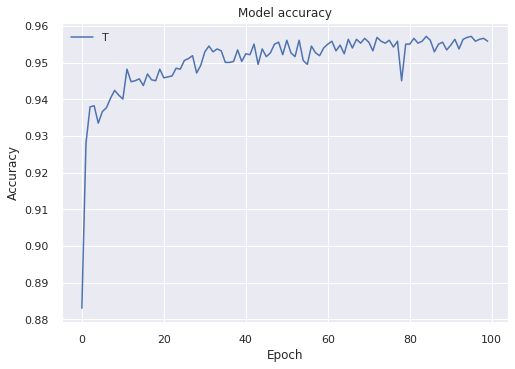

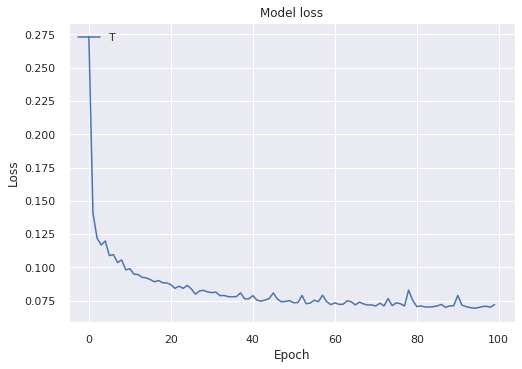

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend('Train', loc='upper left')
plt.show()

# # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend('Train', loc='upper left')
plt.show()

In [398]:
import pandas_profiling
pandas_profiling.ProfileReport(df)